## Titanic Machine Learning Project

### Ayah Metwali

A good portion of this project take influence of the structure format of Lab 3, but will make it as a classification instead.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import cross_validate

def get_classifier_cv_score(model, X, y, scoring='accuracy', cv=7):
    '''Calculate train and validation scores of classifier (model) using cross-validation

        model (sklearn classifier): Classifier to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        scoring (str): a scoring string accepted by sklearn.metrics.cross_validate()
        cv (int): number of cross-validation folds see sklearn.metrics.cross_validate()

        returns: mean training score, mean validation score
    '''

    score = cross_validate(estimator=model, X=X, y=y,
                           cv=cv, scoring=scoring, return_train_score=True)
    score_train = score['train_score'].mean()
    score_test = score['test_score'].mean()

    return (score_train, score_test)

# 1. Load Data

The data is from https://www.kaggle.com/c/titanic/data, 

In [3]:
dataset_train = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')

X = dataset_train.drop(columns=['Survived'])
y = dataset_train['Survived']

print("X.shape={}, type(X)={}\ny.shape={}, type(y)={}". format(X.shape, type(X), y.shape, type(y)))

X.shape=(891, 11), type(X)=<class 'pandas.core.frame.DataFrame'>
y.shape=(891,), type(y)=<class 'pandas.core.series.Series'>


# 2. Inspect the Data

Drop any non-categorical values that are not needed.

First take a look at the data:

In [4]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [6]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Now drop non-categorical values; in this case it is PassengerId, Name, and Ticket):

In [7]:
dataset_list = [X, dataset_test]

X.drop('PassengerId', axis=1, inplace=True)

for d in dataset_list:
    d.drop('Name', axis=1, inplace=True)
    d.drop('Ticket', axis=1, inplace=True)

In [8]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


#### Now drop columns that have a large amount of missing values, in this case it will be cabin. We cannot try to mean/mode the column because cabins are a set value type. Ie) Cabin B45

In [9]:
for d in dataset_list:
    d.drop('Cabin', axis=1, inplace=True)

In [10]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


#### Now go to columns that are able to implement mean/modes to fill in the missing data, in this case it will be Age and Embarked

In [11]:
for d in dataset_list:
    d['Age'].fillna(d['Age'].mean(), inplace=True)
    d['Embarked'] = d['Embarked'].fillna(d['Embarked'].mode()[0])

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [13]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


#### There is a missing value in Fare, just fill it via using mean.

In [14]:
dataset_test['Fare'].fillna(dataset_test['Fare'].mean(), inplace=True)   

In [15]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


### 2.1 - Showing the representation of the data

Showing the data via bar graphs to see how the data are correlated with each other between categorical features and target classes.

This will be showing Pclass, Sex, SibSp, Parch, and Embarked.

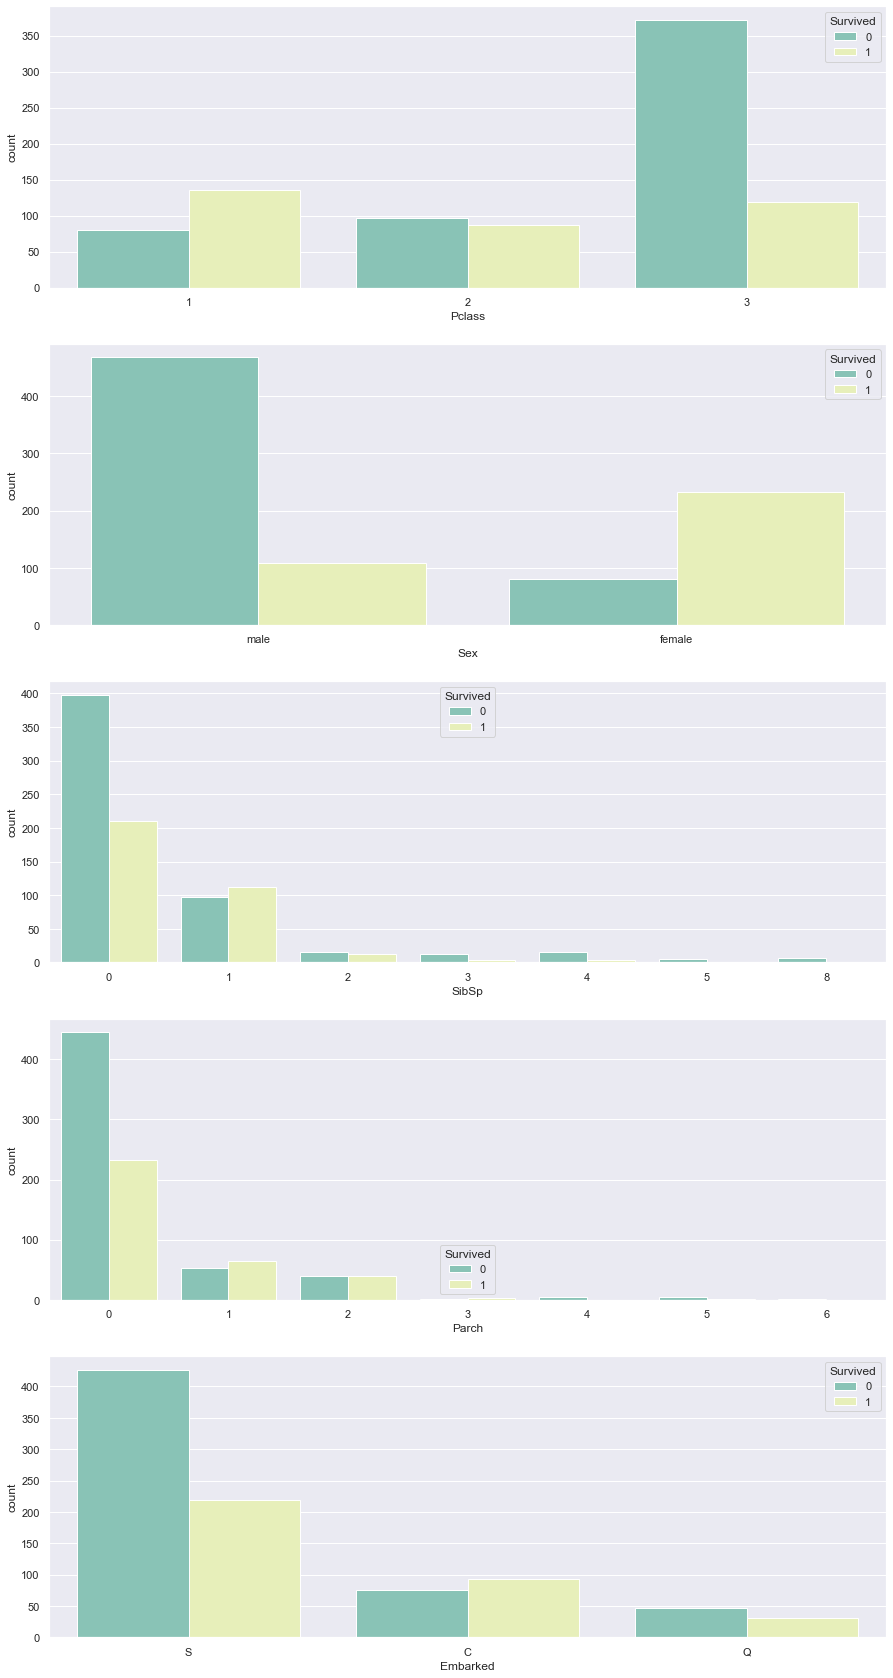

In [16]:
sns.set(rc= {'figure.figsize': (15, 30)})
fig = plt.figure(1)
axs = fig.subplots(5, 1)

sns.countplot(data=X, hue=y, x="Pclass", ax=axs[0], palette= ["#7fcdbb", "#edf8b1"]);
sns.countplot(data=X, hue=y, x="Sex", ax=axs[1], palette= ["#7fcdbb", "#edf8b1"]);
sns.countplot(data=X, hue=y, x="SibSp", ax=axs[2], palette= ["#7fcdbb", "#edf8b1"]);
sns.countplot(data=X, hue=y, x="Parch", ax=axs[3], palette= ["#7fcdbb", "#edf8b1"]);
sns.countplot(data=X, hue=y, x="Embarked", ax=axs[4], palette= ["#7fcdbb", "#edf8b1"]);

# 3. Preprocessing

#### Mapping male = 0 and female = 1

In [17]:
sex_mapping = {"male": 0, "female": 1}

for d in dataset_list:
    d['Sex'] = d['Sex'].map(sex_mapping)

X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,S
1,1,1,38.000000,1,0,71.2833,C
2,3,1,26.000000,0,0,7.9250,S
3,1,1,35.000000,1,0,53.1000,S
4,3,0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,S
887,1,1,19.000000,0,0,30.0000,S
888,3,1,29.699118,1,2,23.4500,S
889,1,0,26.000000,0,0,30.0000,C


#### Convert Age to a categorial feature by binning the age groups. Likewise with converting Fare.

In [18]:
#For Age
for d in dataset_list:
    d['Age'] = d['Age'].astype(int)
    
    d.loc[ d['Age'] <= 16, 'Age'] = 0
    d.loc[(d['Age'] > 16) & (d['Age'] <= 26), 'Age'] = 1
    d.loc[(d['Age'] > 26) & (d['Age'] <= 36), 'Age'] = 2
    d.loc[(d['Age'] > 36) & (d['Age'] <= 62), 'Age'] = 3
    d.loc[ d['Age'] > 62, 'Age'] = 4
    
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,1,0,7.2500,S
1,1,1,3,1,0,71.2833,C
2,3,1,1,0,0,7.9250,S
3,1,1,2,1,0,53.1000,S
4,3,0,2,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,0,2,0,0,13.0000,S
887,1,1,1,0,0,30.0000,S
888,3,1,2,1,2,23.4500,S
889,1,0,1,0,0,30.0000,C


In [19]:
#For Fare
for d in dataset_list:
    d.loc[ d['Fare'] <= 17, 'Fare'] = 0
    d.loc[(d['Fare'] > 17) & (d['Fare'] <= 30), 'Fare'] = 1
    d.loc[(d['Fare'] > 30) & (d['Fare'] <= 100), 'Fare'] = 2
    d.loc[ d['Fare'] > 100, 'Fare'] = 3

X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,1,0,0.0,S
1,1,1,3,1,0,2.0,C
2,3,1,1,0,0,0.0,S
3,1,1,2,1,0,2.0,S
4,3,0,2,0,0,0.0,S
...,...,...,...,...,...,...,...
886,2,0,2,0,0,0.0,S
887,1,1,1,0,0,1.0,S
888,3,1,2,1,2,1.0,S
889,1,0,1,0,0,1.0,C


#### Map values in column Embarked to numerical values

In [20]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}

for d in dataset_list:
    d['Embarked'] = d['Embarked'].map(embarked_mapping)

X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,1,0,0.0,0
1,1,1,3,1,0,2.0,1
2,3,1,1,0,0,0.0,0
3,1,1,2,1,0,2.0,0
4,3,0,2,0,0,0.0,0
...,...,...,...,...,...,...,...
886,2,0,2,0,0,0.0,0
887,1,1,1,0,0,1.0,0
888,3,1,2,1,2,1.0,0
889,1,0,1,0,0,1.0,1


# 4. Compare models using cross-validation

The models selected are *LogisticRegression()*, *RandomForestClassifier(random_state=55)*, *GradientBoostingClassifier(random_state=56)*, *SVC()*, and *XGBClassifier()*.

Then find the training and validation of each:



In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# model list
model_list = [LogisticRegression(), RandomForestClassifier(random_state=55), GradientBoostingClassifier(random_state=56), SVC(), XGBClassifier()]

result_list = []

# iterate over the models to get the train and test score and store in results list
for m in model_list:
    print("{}".format(m.__class__.__name__))
    (score_train, score_test) = get_classifier_cv_score(m, X, y, scoring='average_precision')
    result_list.append((m.__class__.__name__, score_train, score_test))

    print("  1. Training score = {0:.2f}".format(score_train))
    print("  2. Validation score = {0:.2f}\n".format(score_test))


LogisticRegression
  1. Training score = 0.83
  2. Validation score = 0.82

RandomForestClassifier
  1. Training score = 0.93
  2. Validation score = 0.82

GradientBoostingClassifier
  1. Training score = 0.89
  2. Validation score = 0.84

SVC
  1. Training score = 0.82
  2. Validation score = 0.80

XGBClassifier
  1. Training score = 0.92
  2. Validation score = 0.82



# 5. Hyperparameter tuning using grid search

In [22]:
#definition
def print_grid_search_result(grid_search):
    '''Prints summary of best model from GridSearchCV object.
    
        For the best model of the grid search, print:
        - parameters 
        - cross-validation training score
        - cross-validation validation score 
        
        scores are printed with 3 decimal places.
    
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        returns: None
    '''
    
    print("Best parameters   = {}".format(grid_search.best_params_))
    print("CV Training Score = {:.3f}".format(grid_search.cv_results_['mean_train_score'].max()))
    print("CV Test Score     = {:.3f}".format(grid_search.cv_results_['mean_test_score'].max()))
    
    return None

In [23]:
#definition
import mglearn

def plot_grid_search_results(grid_search):
    '''For grids with 2 hyperparameters, create a heatmap plot of test scores
        
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        uses mglearn.tools.heatmap() for plotting.
    '''
    results = pd.DataFrame(grid_search.cv_results_)

    params = sorted(grid_search.param_grid.keys())
    
    print(params)
    
    assert len(params) == 2, "We can only plot two parameters."
    
    # second dimension in reshape are rows, needs to be the fast changing parameter
    scores = np.array(results.mean_test_score).reshape(len(grid_search.param_grid[params[0]]),
                                                      len(grid_search.param_grid[params[1]]))

    # plot the mean cross-validation scores
    # x-axis needs to be the fast changing parameter
    mglearn.tools.heatmap(scores, 
                          xlabel=params[1], 
                          xticklabels=grid_search.param_grid[params[1]], 
                          ylabel=params[0], 
                          yticklabels=grid_search.param_grid[params[0]],
                          cmap="RdPu", fmt="%0.3f")

### 5.1 Logistic Regression

Parameter used for Logistic Regression is:
- 'C': [0.001, 0.01, 0.1, 1, 10]

In [24]:
from sklearn.model_selection import GridSearchCV
# create the parameter grid
param_grid_log = {
    'C': [0.001, 0.01, 0.1, 1, 10]
}

# setup the grid search
grid_log = GridSearchCV(LogisticRegression(), param_grid_log,
                        n_jobs=4, cv=7, scoring='average_precision', return_train_score=True)

In [25]:
# perform the grid search
grid_log.fit(X, y)

GridSearchCV(cv=7, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True, scoring='average_precision')

In [26]:
# print the grid search results
print_grid_search_result(grid_log)

Best parameters   = {'C': 1}
CV Training Score = 0.825
CV Test Score     = 0.819


### 5.2 RandomForestClassifier

Paramters used for RandomForestClassifier are:
- 'n_estimators': [300, 500, 700, 1000]
- 'max_depth': [7, 9, 11, 13]

In [27]:
# create the parameter grid
param_grid_rfc = {
    'n_estimators': [300, 500, 700, 1000],
    'max_depth': [7, 9, 11, 13]
}

# setup the grid search
grid_rfc = GridSearchCV(RandomForestClassifier(random_state=55), param_grid_rfc,
                        n_jobs=4, cv=7, scoring='average_precision', return_train_score=True)

In [28]:
# perform the grid search
grid_rfc.fit(X, y)

GridSearchCV(cv=7, estimator=RandomForestClassifier(random_state=55), n_jobs=4,
             param_grid={'max_depth': [7, 9, 11, 13],
                         'n_estimators': [300, 500, 700, 1000]},
             return_train_score=True, scoring='average_precision')

In [29]:
# print the grid search results
print_grid_search_result(grid_rfc)

Best parameters   = {'max_depth': 7, 'n_estimators': 300}
CV Training Score = 0.932
CV Test Score     = 0.842


['max_depth', 'n_estimators']


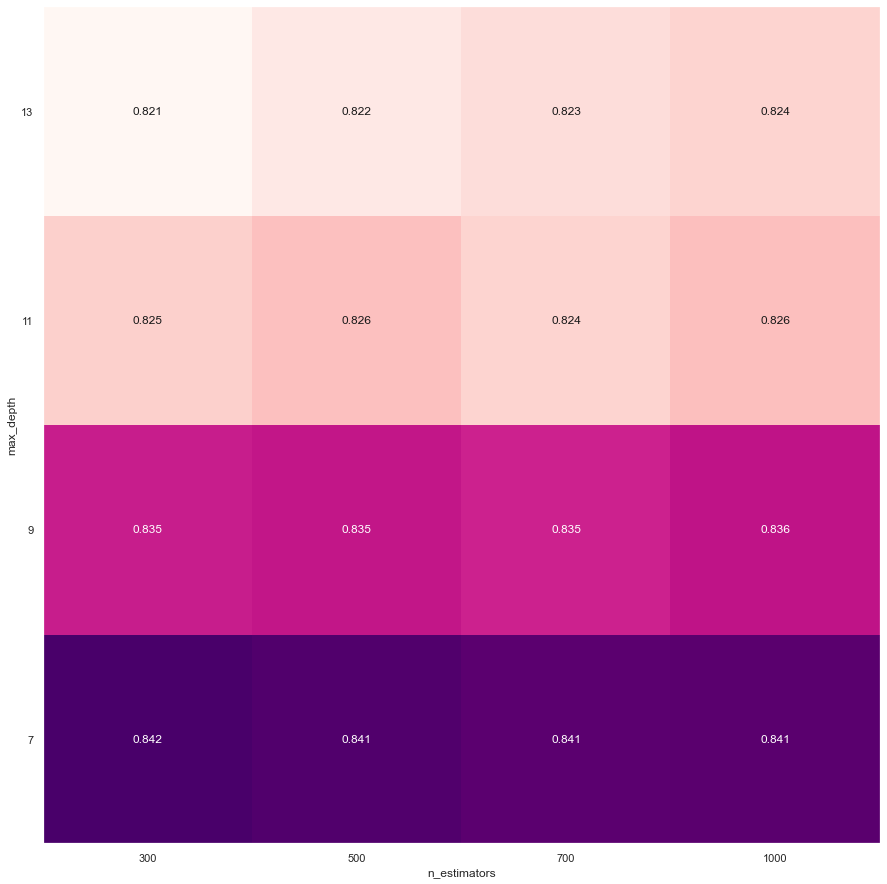

In [30]:
# plot validation metrics for all hyperparameter combinations
plot_grid_search_results(grid_rfc);

### 5.3 GradientBoostingClassifier

Paramters used for GradientBoostingClassifier are:
- 'n_estimators': [50, 100, 200]
- 'learning_rate': [0.001, 0.01, 0.1, 1.0]

In [31]:

from sklearn.model_selection import GridSearchCV

# create the parameter grid
param_grid_gbt = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1.0]
}

# setup the grid search
grid_gbt = GridSearchCV(GradientBoostingClassifier(max_depth=5, random_state=56), param_grid_gbt,
                        n_jobs=4, cv=7, scoring='average_precision', return_train_score=True)

In [32]:
# perform the grid search
grid_gbt.fit(X, y)

GridSearchCV(cv=7,
             estimator=GradientBoostingClassifier(max_depth=5, random_state=56),
             n_jobs=4,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='average_precision')

In [33]:
# print the grid search results
print_grid_search_result(grid_gbt)

Best parameters   = {'learning_rate': 0.01, 'n_estimators': 200}
CV Training Score = 0.938
CV Test Score     = 0.839


['learning_rate', 'n_estimators']


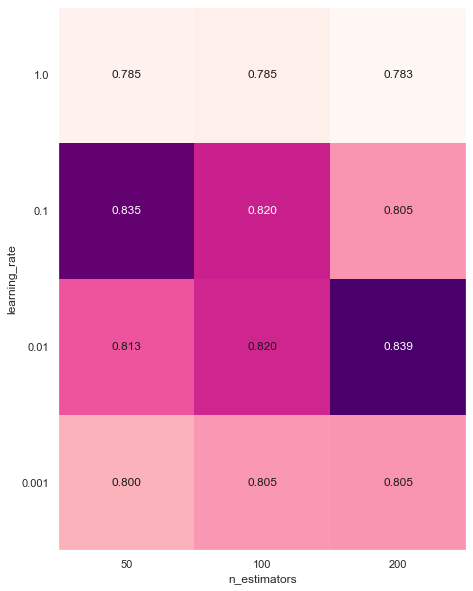

In [34]:
# plot validation metrics for all hyperparameter combinations

#shows a higher number with a darker colour, lower number with lighter colour
sns.set(rc={'figure.figsize':(10, 10)})

plot_grid_search_results(grid_gbt);

### 5.4 SVC

Paramters used for SVC are:
- 'C': [0.0001, 0.001, 0.01, 0.1]
- 'gamma': [0.1, 1, 10, 100]

In [35]:
# create the parameter grid
param_grid_svc = {
    'C': [0.0001, 0.001, 0.01, 0.1],
    'gamma': [0.1, 1, 10, 100]
}

# setup the grid search
grid_svc = GridSearchCV(SVC(), param_grid_svc,
                        n_jobs=4, cv=7, scoring='average_precision', return_train_score=True)

In [36]:
# perform the grid search
grid_svc.fit(X, y)

GridSearchCV(cv=7, estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1],
                         'gamma': [0.1, 1, 10, 100]},
             return_train_score=True, scoring='average_precision')

In [37]:
# print the grid search results
print_grid_search_result(grid_svc)

Best parameters   = {'C': 0.1, 'gamma': 0.1}
CV Training Score = 0.867
CV Test Score     = 0.817


['C', 'gamma']


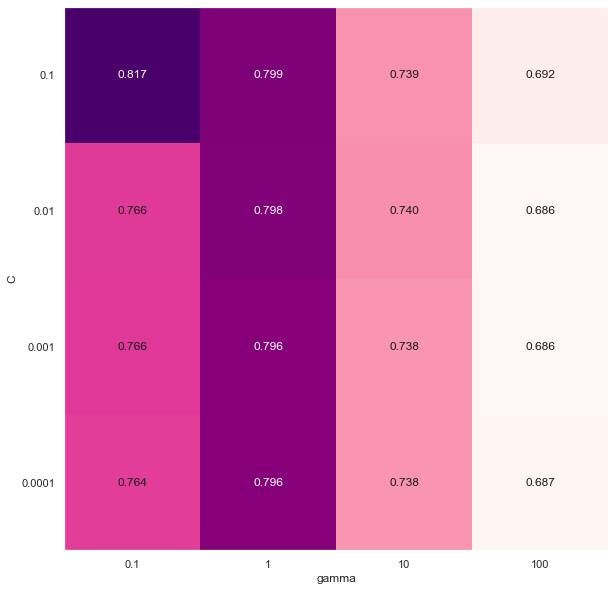

In [38]:
# plot validation metrics for all hyperparameter combinations
plot_grid_search_results(grid_svc);

### 5.5 XGBClassifier

Paramters used for SVC are:
- 'n_estimators': [50, 100, 200, 400, 800]
- 'learning_rate': [0.001, 0.01, 0.1, 1]

In [39]:
# create the parameter grid
param_grid_xgb={'n_estimators': [50, 100, 200, 400, 800],
                'learning_rate': [0.001, 0.01, 0.1, 1]} 

# setup the grid search
grid_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, 
                        n_jobs=4, cv=7, scoring='average_precision', return_train_score=True)

In [40]:
grid_xgb.fit(X, y)

GridSearchCV(cv=7,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [41]:
# 0.92, 0.82
print_grid_search_result(grid_xgb)

Best parameters   = {'learning_rate': 0.01, 'n_estimators': 400}
CV Training Score = 0.937
CV Test Score     = 0.843


['learning_rate', 'n_estimators']


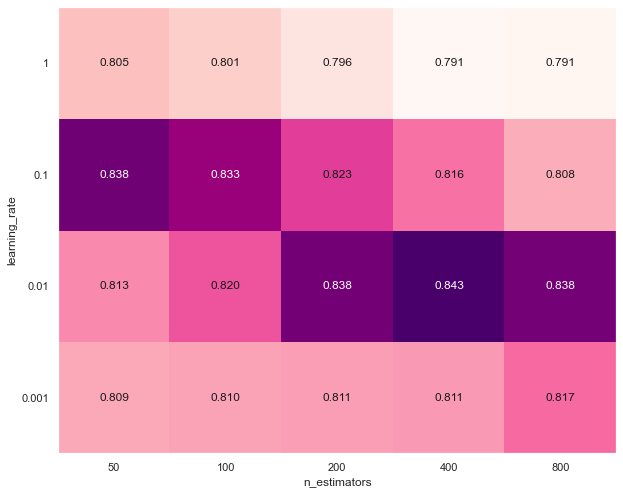

In [42]:
sns.set(rc={'figure.figsize':(10, 10)})

plot_grid_search_results(grid_xgb);

# 6. Results

After tuning the models, here are the training and test scores of each:

LogisticRegression
- CV Training Score = 0.825
- CV Test Score     = 0.819

RandomForestClassifier
- CV Training Score = 0.932
- CV Test Score     = 0.842

GradientBoostingClassifier
- CV Training Score = 0.938
- CV Test Score     = 0.839

SVC
- CV Training Score = 0.867
- CV Test Score     = 0.817

XGBClassifier
- CV Training Score = 0.937
- CV Test Score     = 0.843

#### The best model is XGBClassifier with a Test Score of 0.843

### 6.1 Re-train best model

In [43]:
# retrain XGBClassifier on whole training data
best_model = grid_xgb.best_estimator_
best_model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

### 6.2 Evaluation

In [44]:
dataset_test_without_passengerid = dataset_test.drop("PassengerId", axis=1).copy()

y_pred = best_model.predict(dataset_test_without_passengerid)

In [45]:
prediction_df = pd.DataFrame({
    "PassengerId": dataset_test["PassengerId"],
    "Survived": y_pred
    })

# save the predictions to csv for submission
prediction_df.to_csv('submission.csv', index=False)